In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [3]:
df = pd.concat(
    map(pd.read_csv, ['drive/Shareddrives/DS340W Project/PopularityPrediction-main/INSTAGRAM FILES/merged_file_insta1.csv', 'drive/Shareddrives/DS340W Project/PopularityPrediction-main/FACEBOOK FILES/merged_file_final_fb1.csv']), ignore_index=True)
df = df.dropna()
print(df)

      Child  Smile  Female  Male  PeopleNumber  Text  close_up  Indoors  \
0         1      1       1     0             1     0         0        0   
1         0      1       1     1             2     0         0        0   
2         0      1       1     0             1     0         0        0   
3         1      1       1     0             1     0         0        0   
4         1      1       0     1             1     0         0        0   
...     ...    ...     ...   ...           ...   ...       ...      ...   
4119      1      1       1     1             2     0         0        0   
4120      0      0       0     0             0     1         0        0   
4121      0      1       1     1             2     0         0        0   
4122      1      1       0     1             2     0         0        0   
4123      0      1       1     1             2     1         0        0   

      Outdoors dominantColor  ...  Total Interactions  Contrast  ANGRY CALM  \
0            0      

In [4]:
def change_types(df):
    df['Followers at Posting'] = df['Followers at Posting'].astype('int64')
    df['Child'] = df['Child'].astype('int64')
    df['Smile'] = df['Smile'].astype('int64')
    df['Female'] = df['Female'].astype('int64')
    df['Male'] = df['Male'].astype('int64')
    df['PeopleNumber'] = df['PeopleNumber'].astype('int64')
    df['Text'] = df['Text'].astype('int64')
    df['close_up'] = df['close_up'].astype('int64')
    df['Indoors'] = df['Indoors'].astype('int64')
    df['Outdoors'] = df['Outdoors'].astype('int64')
    return df

In [5]:
df = change_types(df)

In [6]:
df.dtypes

,0
Child,int64
Smile,int64
Female,int64
Male,int64
PeopleNumber,int64
Text,int64
close_up,int64
Indoors,int64
Outdoors,int64
dominantColor,object


In [7]:
df.describe().apply(lambda s: s.apply('{0:.1f}'.format))

,Child,Smile,Female,Male,PeopleNumber,Text,close_up,Indoors,Outdoors,LOGO,Followers at Posting,Total Interactions,ANGRY,CALM,CONFUSED,DISGUSTED,FEAR,HAPPY,SAD,SURPRISED
count,4020.0,4020.0,4020.0,4020.0,4020.0,4020.0,4020.0,4020.0,4020.0,4020.0,4020.0,4020.0,4020.0,4020.0,4020.0,4020.0,4020.0,4020.0,4020.0,4020.0
mean,0.4,0.8,0.7,0.4,1.2,0.3,0.0,0.1,0.1,0.6,6343522.6,50491.0,0.0,0.3,0.0,0.0,0.0,0.4,0.1,0.0
std,0.5,0.4,0.5,0.5,0.7,0.4,0.1,0.2,0.3,0.5,10134479.4,307310.0,0.1,0.5,0.1,0.1,0.2,0.5,0.3,0.1
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4740.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,87607.8,124.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,866633.0,387.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,1.0,1.0,1.0,1.0,2.0,1.0,0.0,0.0,0.0,1.0,8106419.2,10786.2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
max,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,29486754.0,5750308.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


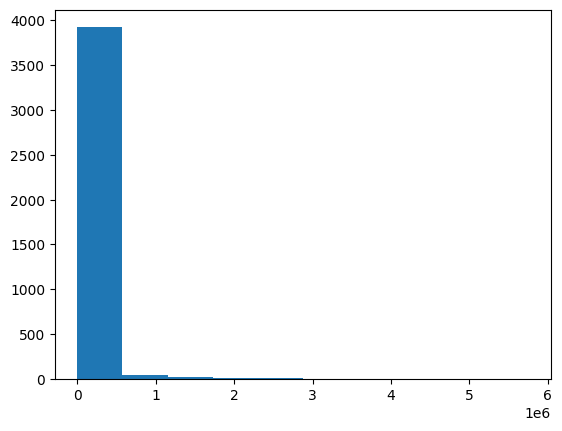

In [8]:
plt.hist(df['Total Interactions'], bins=10)
plt.show()

In [9]:
df[df['Total Interactions']>100000].count()

,0
Child,153
Smile,153
Female,153
Male,153
PeopleNumber,153
Text,153
close_up,153
Indoors,153
Outdoors,153
dominantColor,153


In [10]:
y = df['Total Interactions']
y = (y/df['Followers at Posting'])*1000
y

,0
0,4.593569
1,3.093195
2,3.393552
3,4.390779
4,5.781499
...,...
4119,1.760828
4120,1.379175
4121,1.055932
4122,0.856490


<ipython-input-11-8733ca3f5b98>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y)


,0
count,4020.000000
mean,4.061661
std,12.012685
min,0.004986
25%,0.469793
50%,1.637304
75%,3.411514
max,220.533212


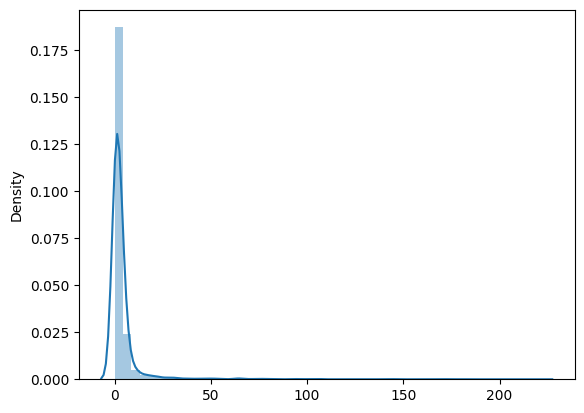

In [11]:
sns.distplot(y)
y.describe()

In [12]:
y[y<y.median()].count()

2010

In [13]:
X = df.drop(['Total Interactions','Followers at Posting'], axis=1)
X

,Child,Smile,Female,Male,PeopleNumber,Text,close_up,Indoors,Outdoors,dominantColor,LOGO,Contrast,ANGRY,CALM,CONFUSED,DISGUSTED,FEAR,HAPPY,SAD,SURPRISED
0,1,1,1,0,1,0,0,0,0,cyan,1,HIGH,0,0,0,0,0,1,0,0
1,0,1,1,1,2,0,0,0,0,green,1,HIGH,0,0,0,0,0,1,0,0
2,0,1,1,0,1,0,0,0,0,grey,1,HIGH,0,1,0,0,0,0,0,0
3,1,1,1,0,1,0,0,0,1,grey,1,HIGH,0,1,0,0,0,0,0,0
4,1,1,0,1,1,0,0,0,0,cyan,1,HIGH,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4119,1,1,1,1,2,0,0,0,0,cyan,1,HIGH,0,1,0,0,0,1,0,0
4120,0,0,0,0,0,1,0,0,0,blue,1,LOW,0,0,0,0,0,0,0,0
4121,0,1,1,1,2,0,0,0,0,cyan,1,HIGH,0,1,0,0,0,0,0,0
4122,1,1,0,1,2,0,0,0,0,grey,1,HIGH,0,1,0,0,0,0,1,0


In [14]:
X = pd.get_dummies(data=X)
X.head()
print(X.columns)
X

Index(['Child', 'Smile', 'Female', 'Male', 'PeopleNumber', 'Text', 'close_up',
       'Indoors', 'Outdoors', 'LOGO', 'ANGRY', 'CALM', 'CONFUSED', 'DISGUSTED',
       'FEAR', 'HAPPY', 'SAD', 'SURPRISED', 'dominantColor_blue',
       'dominantColor_brown', 'dominantColor_cyan', 'dominantColor_green',
       'dominantColor_grey', 'dominantColor_orange', 'dominantColor_pink',
       'dominantColor_purple', 'dominantColor_red', 'dominantColor_white',
       'dominantColor_yellow', 'Contrast_HIGH', 'Contrast_LOW'],
      dtype='object')


,Child,Smile,Female,Male,PeopleNumber,Text,close_up,Indoors,Outdoors,LOGO,...,dominantColor_green,dominantColor_grey,dominantColor_orange,dominantColor_pink,dominantColor_purple,dominantColor_red,dominantColor_white,dominantColor_yellow,Contrast_HIGH,Contrast_LOW
0,1,1,1,0,1,0,0,0,0,1,...,False,False,False,False,False,False,False,False,True,False
1,0,1,1,1,2,0,0,0,0,1,...,True,False,False,False,False,False,False,False,True,False
2,0,1,1,0,1,0,0,0,0,1,...,False,True,False,False,False,False,False,False,True,False
3,1,1,1,0,1,0,0,0,1,1,...,False,True,False,False,False,False,False,False,True,False
4,1,1,0,1,1,0,0,0,0,1,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4119,1,1,1,1,2,0,0,0,0,1,...,False,False,False,False,False,False,False,False,True,False
4120,0,0,0,0,0,1,0,0,0,1,...,False,False,False,False,False,False,False,False,False,True
4121,0,1,1,1,2,0,0,0,0,1,...,False,False,False,False,False,False,False,False,True,False
4122,1,1,0,1,2,0,0,0,0,1,...,False,True,False,False,False,False,False,False,True,False


In [15]:
X.dtypes

,0
Child,int64
Smile,int64
Female,int64
Male,int64
PeopleNumber,int64
Text,int64
close_up,int64
Indoors,int64
Outdoors,int64
LOGO,int64


In [16]:
def change_types(X):
    X['dominantColor_blue'] =X['dominantColor_blue'].astype('int64')
    X['dominantColor_brown'] =X['dominantColor_brown'].astype('int64')
    X['dominantColor_cyan'] =X['dominantColor_cyan'].astype('int64')
    X['dominantColor_green'] =X['dominantColor_green'].astype('int64')
    X['dominantColor_grey'] =X['dominantColor_grey'].astype('int64')
    X['dominantColor_orange'] =X['dominantColor_orange'].astype('int64')
    X['dominantColor_pink'] =X['dominantColor_pink'].astype('int64')
    X['dominantColor_purple'] =X['dominantColor_purple'].astype('int64')
    X['dominantColor_red'] =X['dominantColor_red'].astype('int64')
    X['dominantColor_white'] =X['dominantColor_white'].astype('int64')
    X['dominantColor_yellow'] =X['dominantColor_yellow'].astype('int64')
    X['Contrast_HIGH'] =X['Contrast_HIGH'].astype('int64')
    X['Contrast_LOW'] =X['Contrast_LOW'].astype('int64')
    return X

In [17]:
X = change_types(X)

In [18]:
X.dtypes

,0
Child,int64
Smile,int64
Female,int64
Male,int64
PeopleNumber,int64
Text,int64
close_up,int64
Indoors,int64
Outdoors,int64
LOGO,int64


In [19]:
y_new = []

for i in y:
    if i<y.median():
        y_new.append('0')
    else:
        y_new.append('1')

In [20]:
print(y_new.count('0'))
print(y_new.count('1'))

2010
2010


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y_new, test_size=0.20, random_state=42, stratify=y_new)

In [22]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.5149253731343284

In [23]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X, y_new, cv=10) # cv -->
scores.mean()

0.4554726368159205

In [24]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)
AdaBoostClassifier(n_estimators=100, random_state=0)
y_pred = clf.predict(X_test)
clf.score(X_test, y_test)
print(clf.score(X_test, y_test))
# print(metrics.f1_score(y_test, y_pred, labels=['low', 'high']))
print(metrics.confusion_matrix(y_test, y_pred))

0.5310945273631841
[[104 298]
 [ 79 323]]


In [25]:
scores = cross_val_score(clf, X, y_new, cv=10)
scores.mean()

0.4233830845771144

In [26]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
neigh.score(X_test, y_test)

0.5199004975124378

In [27]:
scores = cross_val_score(neigh, X, y_new, cv=10) # cv -->
scores.mean()

0.47164179104477616

In [28]:
from sklearn.svm import SVC
svc = SVC(gamma='auto')
svc.fit(X_train, y_train)
svc.score(X_test, y_test)

0.5385572139303483

In [29]:
scores = cross_val_score(svc, X, y_new, cv=10)
scores.mean()

0.42263681592039803

In [30]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.527363184079602

In [31]:
scores = cross_val_score(lr, X, y_new, cv=10) # cv -->
scores.mean()

0.43980099502487563

In [32]:
for imp, name in zip(clf.feature_importances_, clf.feature_names_in_):
    print(name, imp)

Child 0.0
Smile 0.0
Female 0.0
Male 0.0
PeopleNumber 0.0
Text 0.0724796611933101
close_up 0.0
Indoors 0.0
Outdoors 0.0
LOGO 0.0
ANGRY 0.0
CALM 0.02801886201675351
CONFUSED 0.0
DISGUSTED 0.0
FEAR 0.0
HAPPY 0.035416519815380666
SAD 0.034411270544920575
SURPRISED 0.042530483157223686
dominantColor_blue 0.0
dominantColor_brown 0.0
dominantColor_cyan 0.0
dominantColor_green 0.0
dominantColor_grey 0.04732608274450435
dominantColor_orange 0.2893133600921762
dominantColor_pink 0.19078258920230692
dominantColor_purple 0.030942563931419424
dominantColor_red 0.0
dominantColor_white 0.13256189160248835
dominantColor_yellow 0.0
Contrast_HIGH 0.04209721893883774
Contrast_LOW 0.054119496760678766


In [33]:
# Sorted feature importances
important_features = pd.Series(data=clf.feature_importances_,index=X_train.columns)
important_features.sort_values(ascending=False,inplace=True)
important_features.astype(float)

,0
dominantColor_orange,0.289313
dominantColor_pink,0.190783
dominantColor_white,0.132562
Text,0.072480
Contrast_LOW,0.054119
dominantColor_grey,0.047326
SURPRISED,0.042530
Contrast_HIGH,0.042097
HAPPY,0.035417
SAD,0.034411
